## 2023년도 부산광역시 도시철도 일별 역별 시간대별 승하차 인원수

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('일별_역별_시간대별_승하차(2023년 12월).csv', encoding='euc-kr')
df.head(3)

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2023-01-01,일,승차,6311,0,0,0,9,...,435,398,336,272,130,138,71,66,7,3
1,95,다대포해수욕장,2023-01-01,일,하차,5839,2,0,0,0,...,313,299,269,126,128,94,115,71,43,29
2,95,다대포해수욕장,2023-01-02,월,승차,4264,0,0,0,18,...,417,262,243,224,133,87,79,62,8,0


#### 월별 승차가 가장 많은 역 TOP5 시각화

In [272]:
df = pd.read_csv('일별_역별_시간대별_승하차(2023년 12월).csv', encoding='euc-kr', usecols=['역번호', '역명', '년월일', '구분', '합계'])
df

,역번호,역명,년월일,구분,합계
0,95,다대포해수욕장,2023-01-01,승차,6311
1,95,다대포해수욕장,2023-01-01,하차,5839
2,95,다대포해수욕장,2023-01-02,승차,4264
3,95,다대포해수욕장,2023-01-02,하차,3300
4,95,다대포해수욕장,2023-01-03,승차,4431
...,...,...,...,...,...
81755,414,안평,2023-12-29,하차,1992
81756,414,안평,2023-12-30,승차,1708
81757,414,안평,2023-12-30,하차,1573
81758,414,안평,2023-12-31,승차,1302


In [273]:
grouped_data = df.groupby('역명')
df_y = pd.DataFrame(df.groupby('역명')['합계'].sum())
df_y.reset_index(inplace=True)
df_y.sort_values('합계', ascending=False, inplace=True)
df_y['합계'] = (df_y['합계'] / 10000).astype(int)
df_y.rename(columns={'합계': '합계(만 명)'}, inplace=True)
df_y.head(10)

,역명,합계(만 명)
1,1서면,1681
72,부산역,1630
76,사상,1530
81,서면,1460
83,센텀시티,1400
32,남포,1332
115,하단,1298
99,자갈치,1277
75,부전,1180
13,경성대부경대,1164


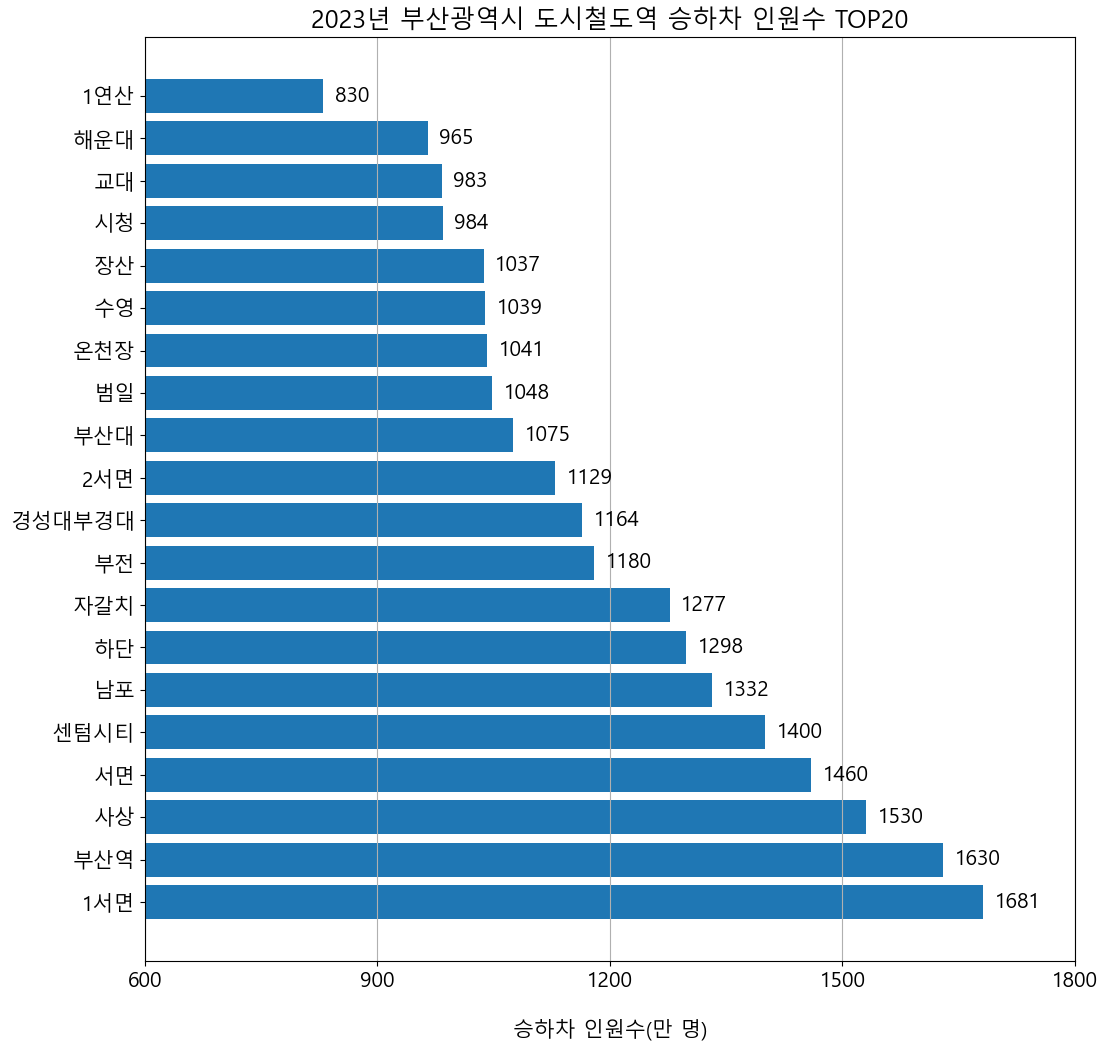

In [279]:
plt.figure(figsize=(12, 12))
barh = plt.barh(df_y['역명'].head(20), df_y['합계(만 명)'].head(20))
plt.title('2023년 부산광역시 도시철도역 승하차 인원수 TOP20')
plt.xlabel('승하차 인원수(만 명)', labelpad=20)
plt.xticks([600, 900, 1200, 1500, 1800])
plt.xlim([600, 1800])
plt.grid(True, axis='x')
for index, value in enumerate(df_y['합계(만 명)'].head(20)):
    plt.text(value+15, index, str(value), verticalalignment='center')
plt.savefig('2023_TOP20.png', dpi=100)
plt.show()

In [275]:
df.set_index('년월일', inplace=True)
df

,역번호,역명,구분,합계
년월일,,,,
2023-01-01,95,다대포해수욕장,승차,6311
2023-01-01,95,다대포해수욕장,하차,5839
2023-01-02,95,다대포해수욕장,승차,4264
2023-01-02,95,다대포해수욕장,하차,3300
2023-01-03,95,다대포해수욕장,승차,4431
...,...,...,...,...
2023-12-29,414,안평,하차,1992
2023-12-30,414,안평,승차,1708
2023-12-30,414,안평,하차,1573


In [276]:
# 역별 승하차 정보를 그룹화
grouped_data = df.groupby('역명')
df.groupby('역명')['합계'].sum()

역명
1동래     8062476
1서면    16816218
1연산     8301582
2덕천     2767436
2서면    11291496
         ...   
토성      6212747
하단     12980735
해운대     9657955
호포       889486
화명      7227937
Name: 합계, Length: 119, dtype: int64

In [277]:


# 월별로 데이터를 재샘플링하고 역별 승하차 정보를 합산
monthly_station_data = {}
for name, group in grouped_data:
    monthly_data = group.resample('M').sum()
    monthly_station_data[name] = monthly_data

# 결과 출력
for name, data in monthly_station_data.items():
    print(f"역명: {name}")
    print(data)

C:\Users\its\AppData\Local\Temp\ipykernel_2836\2156705465.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M').sum()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
df['역명'].unique()

array(['다대포해수욕장', '다대포항', '낫개', '신장림', '장림', '동매', '신평', '하단', '당리', '사하',
       '괴정', '대티', '서대신', '동대신', '토성', '자갈치', '남포', '중앙', '부산역', '초량',
       '부산진', '좌천', '범일', '범내골', '1서면', '부전', '양정', '시청', '1연산', '교대',
       '1동래', '명륜', '온천장', '부산대', '장전', '구서', '두실', '남산', '범어사', '노포',
       '장산', '중동', '해운대', '동백', '벡스코', '센텀시티', '민락', '수영', '광안', '금련산',
       '남천', '경성대부경대', '대연', '못골', '지게골', '문현', '국제금융센터', '전포', '2서면',
       '부암', '가야', '동의대', '개금', '냉정', '주례', '감전', '사상', '덕포', '모덕', '모라',
       '구남', '구명', '2덕천', '수정', '화명', '율리', '동원', '금곡', '호포', '증산',
       '부산대양산', '남양산', '양산', '망미', '배산', '물만골', '3연산', '거제', '종합운동장',
       '사직', '미남', '만덕', '남산정', '숙등', '3덕천', '구포', '강서구청', '체육공원', '대저',
       '4동래', '수안', '낙민', '충렬사', '명장', '서동', '금사', '반여농산물', '석대', '영산대',
       '윗반송', '고촌', '안평', '서면', '연산', '동래', '국제금융센터부산은행', '덕천',
       '부산대양산캠퍼스', '반여농산물시장'], dtype=object)

#### 월별 하차가 가장 많은 역 TOP5 시각화